In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
import xgboost as xgb


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Load data
file_path = 'Data.xlsx'  # Update with the actual path to your Excel file
data = pd.read_excel(file_path)

In [5]:
data2=data.drop(['Hyperlipidemia','Hypertension', 'Gender','Diabetes' , 'LDL', 'HDL','waist_circ', 'Triglyceride' , 'PreviousCABG','Smoking','HDL/Chl','Total Cholesterol',
             'PreviousPCI', 'Door to Device Distance',  'LDL/Chl' ], axis=1)

In [6]:
#df_filtered = data[data['CohortName'].isin([1,2])]
X = data.drop(['MACE'], axis=1)
y = data['MACE']

In [7]:
# Handle class imbalance with SMOTE
smote = SMOTE(sampling_strategy= 0.5 ,random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
X_resampled

,Pre PCI EF,Age,Gender,BMI,waist_circ,Total Cholesterol,Triglyceride,LDL,HDL,LDLtoHDL,...,FBS,Creatinine,Hemoglobin,Hyperlipidemia,Diabetes,Hypertension,Smoking,PreviousCABG,PreviousPCI,Door to Device Distance
0,40.000000,92,0,22.660000,80,98,41,29,67,0.432836,...,165,1.000000,12.100000,0,0,0,0,0,0,179
1,37.500000,77,0,21.870000,94,136,47,42,89,0.471910,...,86,0.900000,13.300000,0,0,1,0,0,0,98
2,45.000000,82,0,30.800000,106,124,53,41,84,0.488095,...,133,0.700000,14.800000,1,1,1,0,0,0,75
3,45.000000,77,0,24.970000,94,86,69,25,48,0.520833,...,125,3.200000,7.200000,0,0,0,0,0,1,85
4,25.000000,66,1,25.810000,98,83,54,25,45,0.555556,...,86,0.340000,11.320000,1,1,0,1,0,1,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,36.402737,72,0,28.398077,107,121,117,65,44,1.474777,...,152,0.928055,14.415836,1,0,1,0,0,0,341
1805,30.005768,77,0,34.218809,100,99,129,50,28,1.788437,...,373,1.101061,10.810152,0,1,1,0,0,0,20
1806,27.524031,73,1,26.793245,97,108,63,57,35,1.622717,...,317,1.931081,14.932450,0,1,1,1,0,0,38
1807,45.000000,70,0,26.551575,95,131,83,79,45,1.742618,...,127,0.855536,15.393506,0,0,0,0,0,0,27


In [9]:
X_resampled.columns

Index(['Pre PCI EF', 'Age', 'Gender', 'BMI', 'waist_circ', 'Total Cholesterol',
       'Triglyceride', 'LDL', 'HDL', 'LDLtoHDL', 'LDL/Chl', 'HDL/Chl', 'FBS',
       'Creatinine', 'Hemoglobin', 'Hyperlipidemia', 'Diabetes',
       'Hypertension', 'Smoking', 'PreviousCABG', 'PreviousPCI',
       'Door to Device Distance'],
      dtype='object')

In [10]:
categorical_cols = [ ]  # Replace with actual categorical columns
continuous_cols = ['Pre PCI EF', 'Age', 'BMI', 'FBS','LDLtoHDL','Creatinine','Hemoglobin',]

In [11]:
columns_to_scale = ['Pre PCI EF', 'Age', 'BMI', 'FBS','LDLtoHDL','Creatinine','Hemoglobin',]
# Initialize the StandardScaler
scaler = StandardScaler()
scaler.fit(X_resampled[columns_to_scale])
# Apply the scaler to the selected columns
X_scaled = X_resampled.copy()
X_scaled[columns_to_scale] = scaler.transform(X_resampled[columns_to_scale])

X_scaled

,Pre PCI EF,Age,Gender,BMI,waist_circ,Total Cholesterol,Triglyceride,LDL,HDL,LDLtoHDL,...,FBS,Creatinine,Hemoglobin,Hyperlipidemia,Diabetes,Hypertension,Smoking,PreviousCABG,PreviousPCI,Door to Device Distance
0,0.039275,2.580910,0,-1.049233,80,98,41,29,67,-2.212671,...,0.251604,-0.214770,-1.091272,0,0,0,0,0,0,179
1,-0.259525,0.357076,0,-1.229976,94,136,47,42,89,-2.171126,...,-0.873495,-0.445118,-0.467257,0,0,1,0,0,0,98
2,0.636876,1.098354,0,0.813104,106,124,53,41,84,-2.153917,...,-0.204132,-0.905815,0.312763,1,1,1,0,0,0,75
3,0.636876,0.357076,0,-0.520732,94,86,69,25,48,-2.119109,...,-0.318066,4.852899,-3.639336,0,0,0,0,0,1,85
4,-1.753527,-1.273736,1,-0.328550,98,83,54,25,45,-2.082191,...,-0.873495,-1.735070,-1.496882,1,1,0,1,0,1,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,-0.390670,-0.384203,0,0.263572,107,121,117,65,44,-1.104841,...,0.066462,-0.380494,0.112993,1,0,1,0,0,0,341
1805,-1.155237,0.357076,0,1.595287,100,99,129,50,28,-0.771346,...,3.213890,0.018024,-1.762010,0,1,1,0,0,0,20
1806,-1.451855,-0.235947,1,-0.103595,97,108,63,57,35,-0.947545,...,2.416352,1.929961,0.381639,0,1,1,1,0,0,38
1807,0.636876,-0.680714,0,-0.158886,95,131,83,79,45,-0.820062,...,-0.289582,-0.547541,0.621394,0,0,0,0,0,0,27


In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# Models dictionary
models = {
     'XGradient Boosting': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Random Forest': RandomForestClassifier(criterion='entropy'),
    'Logistic Regression': LogisticRegression(solver='lbfgs', penalty='l2', max_iter=2000),
    'Neural Network': MLPClassifier(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
}

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


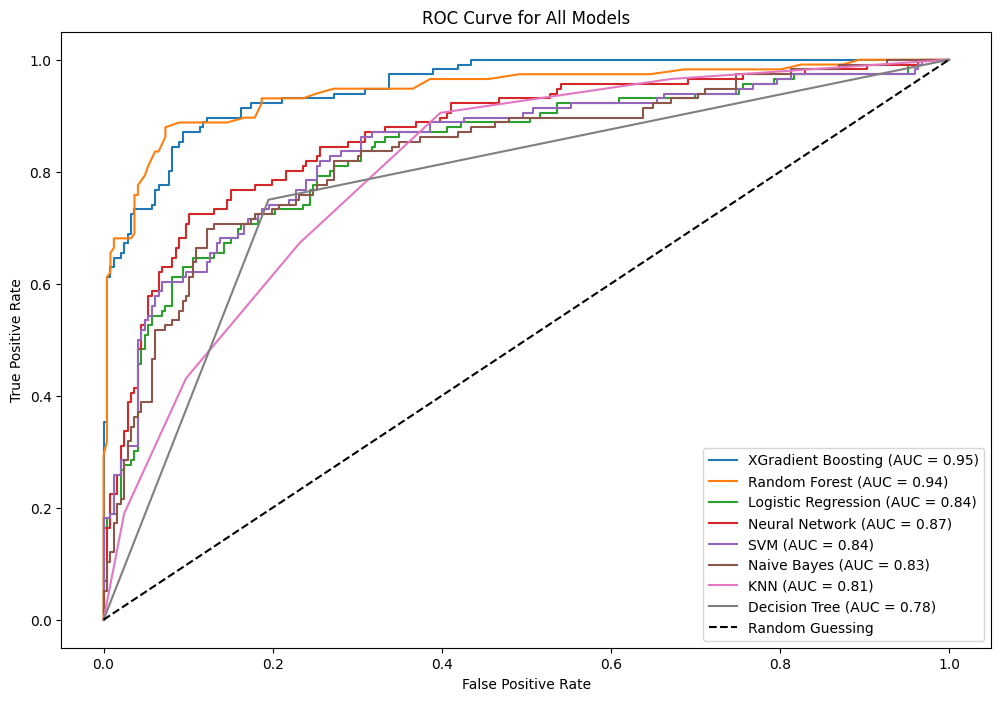

                 Model       AUC  Accuracy  Balanced Accuracy  Sensitivity  \
0   XGradient Boosting  0.951920  0.883978           0.855411     0.775862   
1        Random Forest  0.944736  0.892265           0.852397     0.741379   
2  Logistic Regression  0.837153  0.814917           0.763597     0.620690   
3       Neural Network  0.869708  0.795580           0.703813     0.448276   
4                  SVM  0.843251  0.809392           0.757254     0.612069   
5          Naive Bayes  0.832913  0.779006           0.764508     0.724138   
6                  KNN  0.808838  0.737569           0.720353     0.672414   
7        Decision Tree  0.777439  0.787293           0.777439     0.750000   

   Precision (PPV)  F1 Score       PPV       NPV  Sensitivity  Specificity  
0         0.849057  0.810811  0.849057  0.898438     0.775862     0.934959  
1         0.905263  0.815166  0.905263  0.887640     0.741379     0.963415  
2         0.757895  0.682464  0.757895  0.835206     0.620690     

In [15]:


# Evaluation metrics storage
results = []

# Plotting the ROC curve
plt.figure(figsize=(12, 8))
for name, model in models.items():
    # Fitting the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Calculating metrics
    auc_score = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)  # Sensitivity (Recall for positive class)

    # Correct Specificity calculation
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)  # Specificity

    # **Precision (PPV)**: Positive Predictive Value
    precision = precision_score(y_test, y_pred)  # Precision for class 1 (positive class)

    # **Negative Predictive Value (NPV)**: Proportion of correctly predicted negative cases
    npv = tn / (tn + fn) if tn + fn > 0 else 0  # Negative Predictive Value

    f1 = f1_score(y_test, y_pred)

    # Storing results
    results.append([name, auc_score, acc, bal_acc, sensitivity, precision, f1, precision, npv, sensitivity, specificity])

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Finalizing ROC curve plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='best')
#plt.grid()
plt.show()

# Creating a DataFrame for the metrics
columns = [
    'Model', 'AUC', 'Accuracy', 'Balanced Accuracy', 'Sensitivity',
    'Precision (PPV)', 'F1 Score', 'PPV', 'NPV', 'Sensitivity', 'Specificity'
]
results_df = pd.DataFrame(results, columns=columns)

# Display the final results table
print(results_df)

In [16]:
results_df = pd.DataFrame(results, columns=columns)
results_df

,Model,AUC,Accuracy,Balanced Accuracy,Sensitivity,Precision (PPV),F1 Score,PPV,NPV,Sensitivity,Specificity
0,XGradient Boosting,0.951920,0.883978,0.855411,0.775862,0.849057,0.810811,0.849057,0.898438,0.775862,0.934959
1,Random Forest,0.944736,0.892265,0.852397,0.741379,0.905263,0.815166,0.905263,0.887640,0.741379,0.963415
2,Logistic Regression,0.837153,0.814917,0.763597,0.620690,0.757895,0.682464,0.757895,0.835206,0.620690,0.906504
3,Neural Network,0.869708,0.795580,0.703813,0.448276,0.838710,0.584270,0.838710,0.786667,0.448276,0.959350
4,SVM,0.843251,0.809392,0.757254,0.612069,0.747368,0.672986,0.747368,0.831461,0.612069,0.902439
5,Naive Bayes,0.832913,0.779006,0.764508,0.724138,0.636364,0.677419,0.636364,0.860870,0.724138,0.804878
6,KNN,0.808838,0.737569,0.720353,0.672414,0.577778,0.621514,0.577778,0.832599,0.672414,0.768293
7,Decision Tree,0.777439,0.787293,0.777439,0.750000,0.644444,0.693227,0.644444,0.872247,0.750000,0.804878
